<a href="https://colab.research.google.com/github/Udhay2898/Shopping-Trends/blob/Master/Agg_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data Sets/shopping.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [6]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [8]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"{column}:\n {unique_values}\n")


Customer ID:
 [   1    2    3 ... 3898 3899 3900]

Age:
 [55 19 50 21 45 46 63 27 26 57 53 30 61 65 64 25 52 66 31 56 18 38 54 33
 36 35 29 70 69 67 20 39 42 68 49 59 47 40 41 48 22 24 44 37 58 32 62 51
 28 43 34 23 60]

Gender:
 ['Male' 'Female']

Item Purchased:
 ['Blouse' 'Sweater' 'Jeans' 'Sandals' 'Sneakers' 'Shirt' 'Shorts' 'Coat'
 'Handbag' 'Shoes' 'Dress' 'Skirt' 'Sunglasses' 'Pants' 'Jacket' 'Hoodie'
 'Jewelry' 'T-shirt' 'Scarf' 'Hat' 'Socks' 'Backpack' 'Belt' 'Boots'
 'Gloves']

Category:
 ['Clothing' 'Footwear' 'Outerwear' 'Accessories']

Purchase Amount (USD):
 [ 53  64  73  90  49  20  85  34  97  31  68  72  51  81  36  38  48  62
  37  88  22  25  56  94  79  67  91  33  69  45  60  76  39 100  21  43
  54  55  30  28  59  24  83  46  70  29  26  58  96  40  32  95  41  47
  99  87  92  98  89  35  75  65  86  84  77  27  23  74  80  42  61  82
  78  93  50  57  66  44  52  71  63]

Location:
 ['Kentucky' 'Maine' 'Massachusetts' 'Rhode Island' 'Oregon' 'Wyoming'
 'Montan

In [15]:
g_Item_Purchased = df.groupby(['Item Purchased','Gender']).agg({'Category' : 'count',
                                                     'Purchase Amount (USD)' : 'sum',}).reset_index()

g_Item_Purchased

,Item Purchased,Gender,Category,Purchase Amount (USD)
0,Backpack,Female,37,2413
1,Backpack,Male,106,6223
2,Belt,Female,55,3209
3,Belt,Male,106,6426
4,Blouse,Female,66,4016
5,Blouse,Male,105,6394
6,Boots,Female,50,3226
7,Boots,Male,94,5792
8,Coat,Female,47,2847
9,Coat,Male,114,6428


In [18]:
g_Item_Purchased_pivot = g_Item_Purchased.pivot(index='Item Purchased',columns='Gender',values=['Category'])

g_Item_Purchased_pivot

Category     
Gender           Female Male
Item Purchased              
Backpack             37  106
Belt                 55  106
Blouse               66  105
Boots                50   94
Coat                 47  114
Dress                52  114
Gloves               37  103
Handbag              58   95
Hat                  52  102
Hoodie               51  100
Jacket               54  109
Jeans                29   95
Jewelry              52  119
Pants                48  123
Sandals              59  101
Scarf                45  112
Shirt                59  110
Shoes                48  102
Shorts               48  109
Skirt                49  109
Sneakers             42  103
Socks                58  101
Sunglasses           56  105
Sweater              50  114
T-shirt              46  101

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


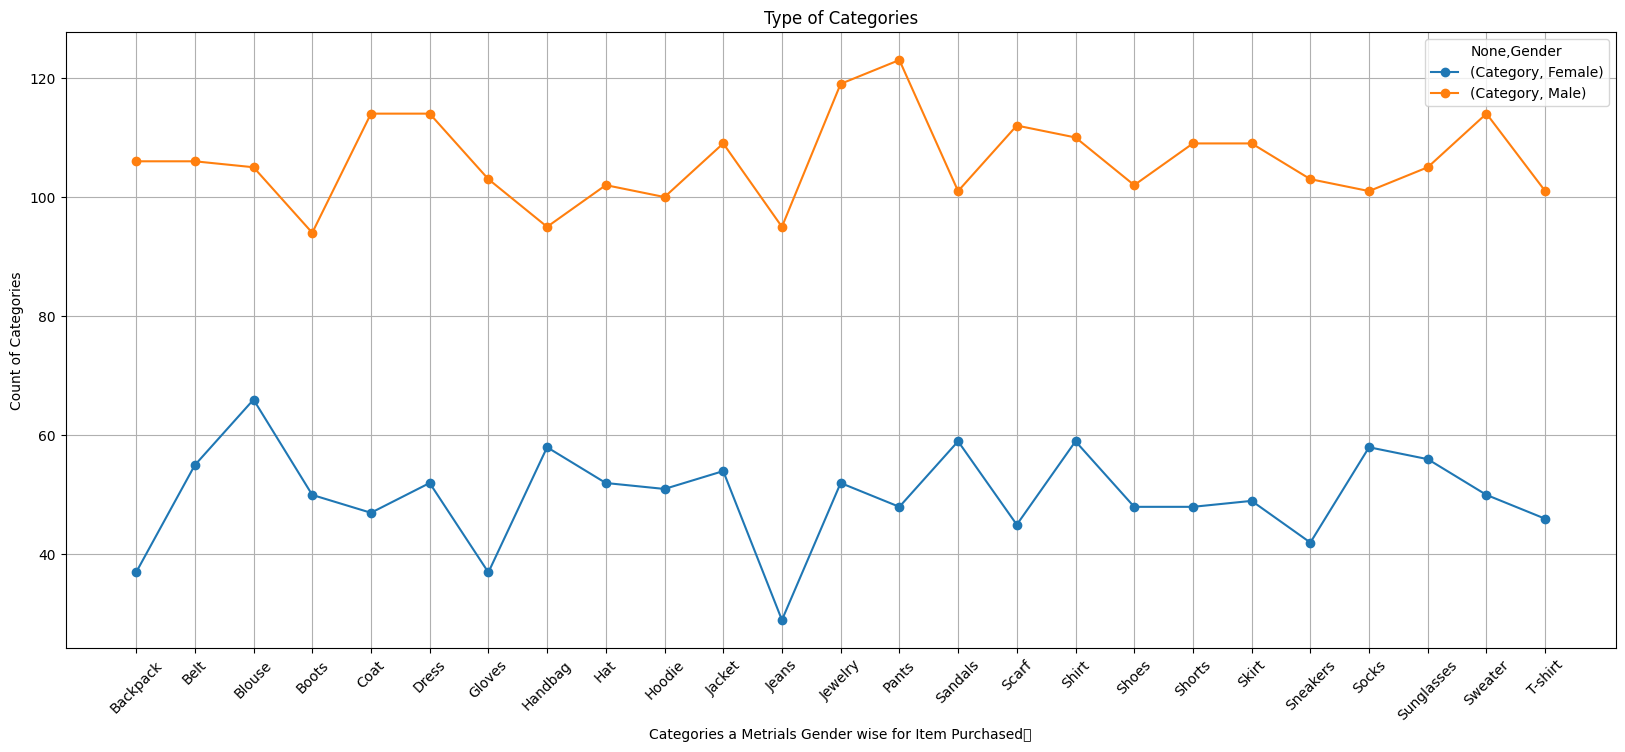

In [31]:
g_Item_Purchased_pivot.plot(figsize = (20,8),marker = 'o', grid = True, legend = True)

tick = range(len(g_Item_Purchased_pivot))

plt.xticks(ticks = tick, labels = g_Item_Purchased_pivot.index, rotation = 45)

plt.xlabel('Categories a Metrials Gender wise for Item Purchased	')
plt.ylabel('Count of Categories')
plt.title('Type of Categories')

plt.show()


In [36]:
g_Season = df.groupby(['Season','Gender','Payment Method']).agg({'Location' : 'count',
                                                               'Purchase Amount (USD)' : 'sum',}).reset_index()

g_Season

,Season,Gender,Payment Method,Location,Purchase Amount (USD)
0,Fall,Female,Bank Transfer,55,3200
1,Fall,Female,Cash,60,3691
2,Fall,Female,Credit Card,52,3334
3,Fall,Female,Debit Card,51,3062
4,Fall,Female,PayPal,47,3027
5,Fall,Female,Venmo,63,3879
6,Fall,Male,Bank Transfer,95,5559
7,Fall,Male,Cash,119,7415
8,Fall,Male,Credit Card,106,6571
9,Fall,Male,Debit Card,118,7538


In [42]:
g_Season_pivot = g_Season.pivot(index = ['Season','Gender'],columns = 'Payment Method',values = 'Purchase Amount (USD)')

g_Season_pivot

Payment Method  Bank Transfer  Cash  Credit Card  Debit Card  PayPal  Venmo
Season Gender                                                              
Fall   Female            3200  3691         3334        3062    3027   3879
       Male              5559  7415         6571        7538    5919   6823
Spring Female            3171  2950         3176        3105    3433   2743
       Male              5652  7149         7556        6837    7184   5723
Summer Female            3039  3012         3088        2750    3234   2937
       Male              6064  6800         6159        6751    5884   6059
Winter Female            2764  2784         3752        2392    3830   2838
       Male              7095  6201         6674        6307    7598   6372

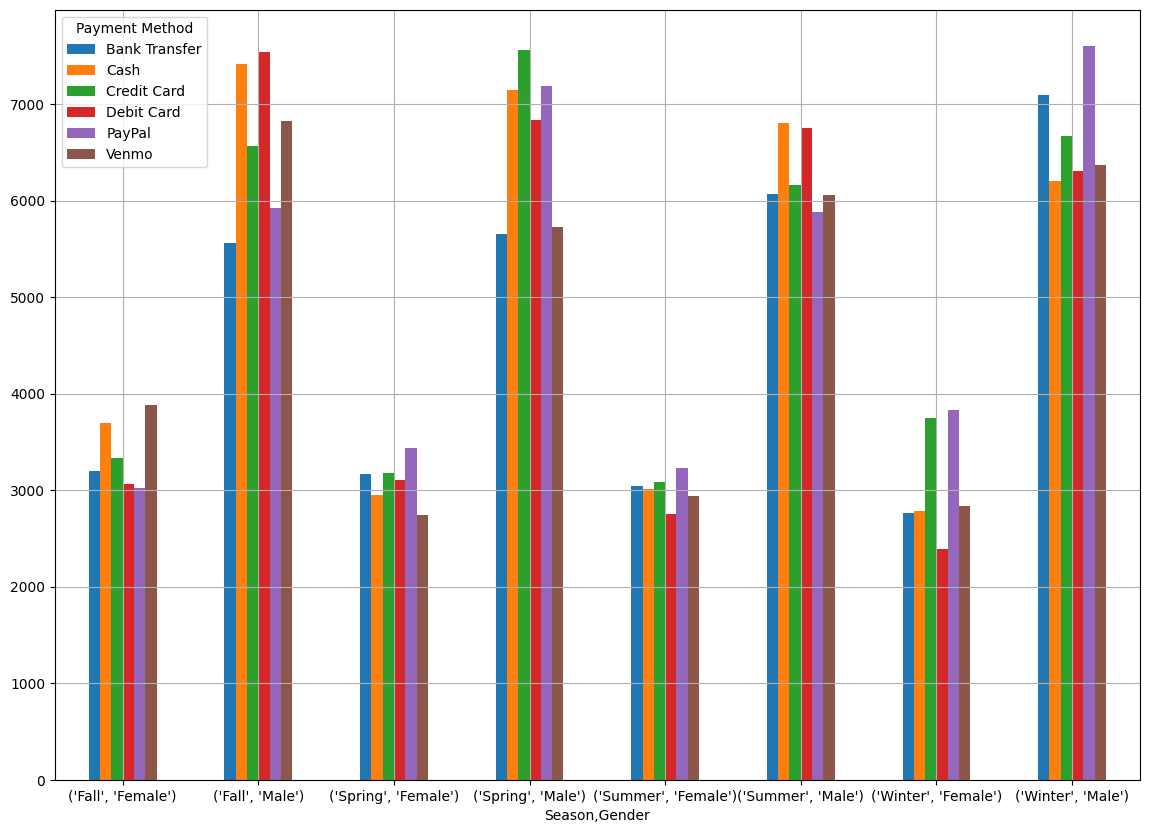

In [49]:
g_Season_pivot.plot.bar(figsize = (14,10), grid = True, legend = True)

tick = range(len(g_Season_pivot))

plt.xticks(ticks = tick, labels = g_Season_pivot.index, rotation = 0)

plt.show()

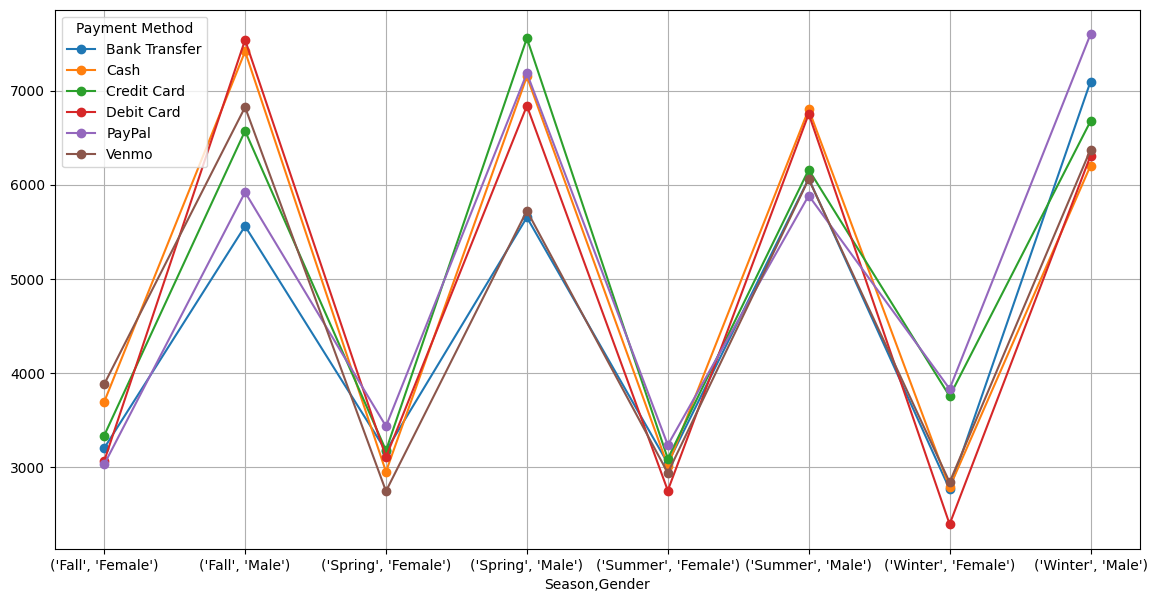

In [55]:
g_Season_pivot.plot.line(figsize = (14,7), marker = 'o',grid = True, legend = True)

tick = range(len(g_Season_pivot))

plt.xticks(ticks = tick, labels = g_Season_pivot.index, rotation = 0)

plt.show()

In [56]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [60]:
g_Category = df.groupby(['Category','Subscription Status','Discount Applied','Promo Code Used']).agg({'Gender' : 'count'}).reset_index()

g_Category

,Category,Subscription Status,Discount Applied,Promo Code Used,Gender
0,Accessories,No,No,No,697
1,Accessories,No,Yes,Yes,209
2,Accessories,Yes,Yes,Yes,334
3,Clothing,No,No,No,1006
4,Clothing,No,Yes,Yes,274
5,Clothing,Yes,Yes,Yes,457
6,Footwear,No,No,No,340
7,Footwear,No,Yes,Yes,88
8,Footwear,Yes,Yes,Yes,171
9,Outerwear,No,No,No,180


In [69]:
g_Category_pivot = g_Category.pivot(index = 'Category',
                                    columns = ['Subscription Status','Promo Code Used'],
                                    values = 'Gender')

g_Category_pivot

Subscription Status    No       Yes
Promo Code Used        No  Yes  Yes
Category                           
Accessories           697  209  334
Clothing             1006  274  457
Footwear              340   88  171
Outerwear             180   53   91

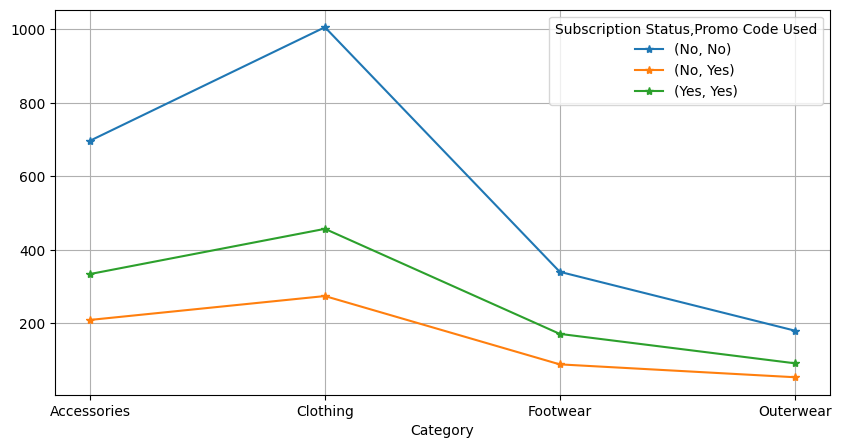

In [79]:
g_Category_pivot.plot.line(figsize = (10,5), marker = '*',grid = True, legend = True)

tick = range(len(g_Category_pivot))
plt.xticks(ticks = tick, labels = g_Category_pivot.index, rotation = 0)

plt.show()

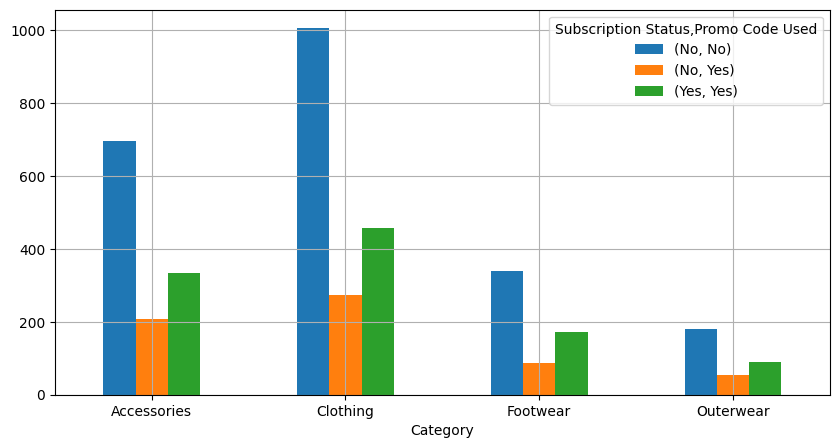

In [77]:
g_Category_pivot.plot.bar(figsize = (10,5),grid = True, legend = True)

tick = range(len(g_Category_pivot))
plt.xticks(ticks = tick, labels = g_Category_pivot.index, rotation = 0)

plt.show()

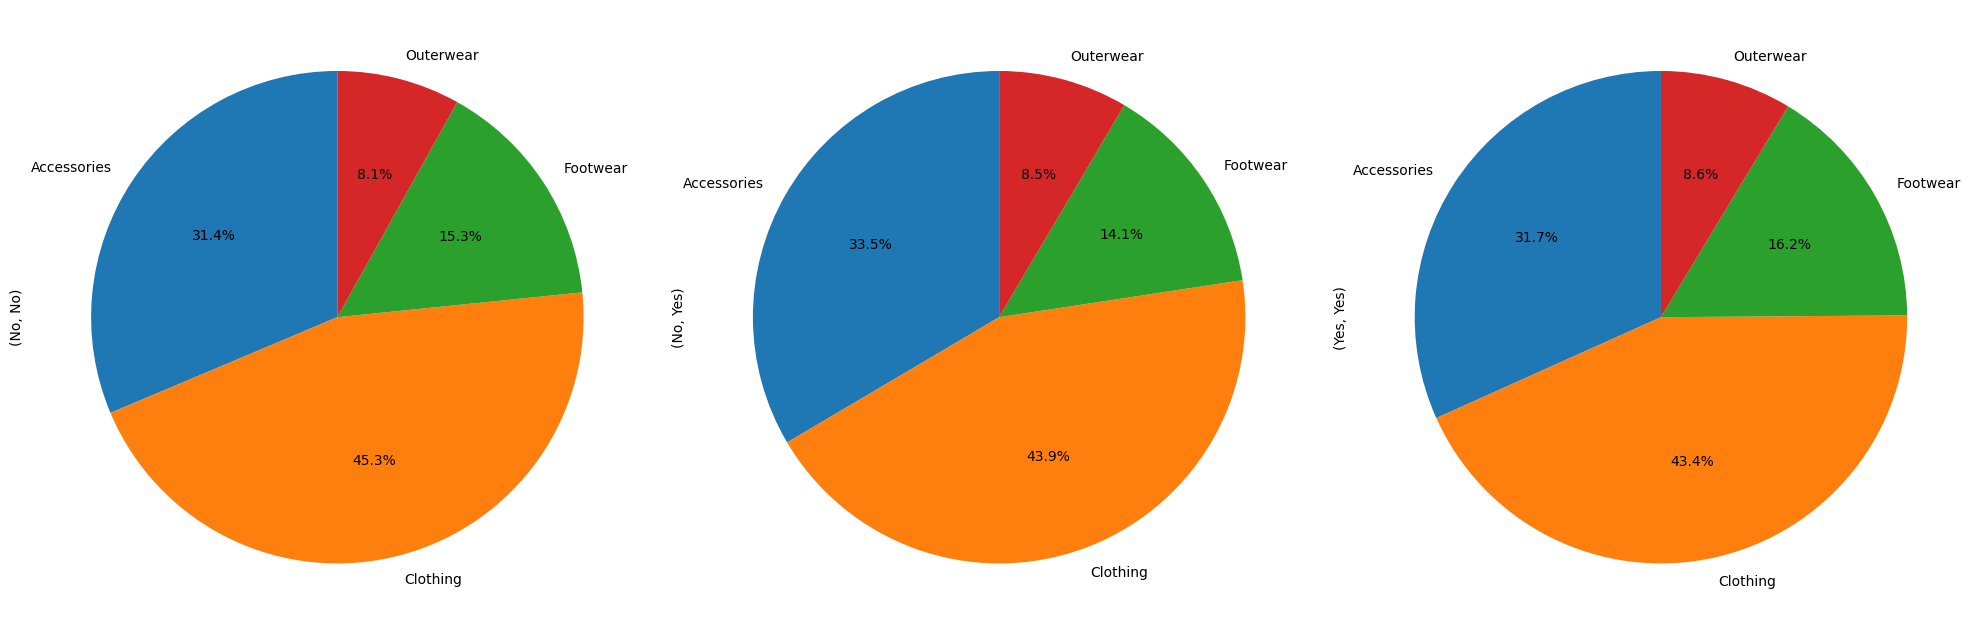

In [93]:
fig, axes = plt.subplots(nrows=1, ncols=len(g_Category_pivot.columns), figsize=(20, 10))
g_Category_pivot.plot.pie(subplots=True, ax=axes, legend=False, autopct='%1.1f%%', startangle = 90)

plt.tight_layout()
plt.show()
